In [1]:
import numpy as np
from tc_utils import *
from scipy.special import erf
import sys, os
from itertools import dropwhile


0.000264819 -0.0025481 0.00689859 0.00333889
(8.090396871107982e-06, 8.982144884659406e-20)
1.308540789933005e-08


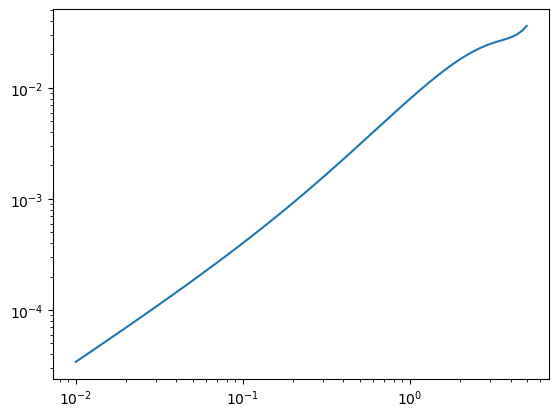

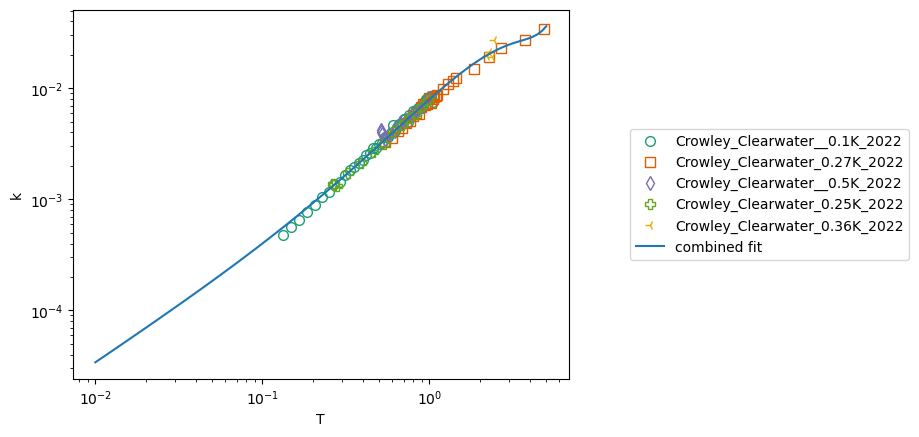

In [9]:
mat = "Clearwater"
tc_file_date = "2024-05-30"


TCdata = np.loadtxt(f"..{os.sep}thermal_conductivity_compilation_{tc_file_date}.csv", dtype=str, delimiter=',')
headers = TCdata[0]
mat_names = TCdata[:,0]

mat_row = TCdata[int(np.argwhere(mat_names == mat))]
num_hi = sum(1 for c in headers[4:] if c.isupper())
num_low = sum(1 for c in headers[4:-1] if c.islower())
fit_params = mat_row
fit_params = np.char.replace(fit_params, "^", "0")
# fit_range, low_param, hi_param, erf_param = np.array(mat_row[2:4], dtype=float), np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])

fit_range = np.array(mat_row[2:4], dtype=float)
# zip headers
# loop through headers and if lower case add to low_param etc

low_param = []
hi_param = []
for key in headers[4:]:
    if key.islower() and key != "erf param":
        low_param.append(float(fit_params[int(np.argwhere(headers == key))]))
    elif key.isupper():
        hi_param.append(float(fit_params[int(np.argwhere(headers == key))]))
    elif key == "erf param":
        erf_param = float(fit_params[int(np.argwhere(headers == key))])

def remove_trailing_zeros(arr):
    return list(dropwhile(lambda x: x == 0, arr[::-1]))[::-1]


# Example usage
#print(low_param, hi_param, erf_param)
low_param = remove_trailing_zeros(low_param)
hi_param = remove_trailing_zeros(hi_param)

a = low_param[0]
b = low_param[1]
c = low_param[2]
d = low_param[3]
print(a,b,c,d)
from scipy.integrate import quad
def integrand(t, a, b, c, d):
    return a*t**4 + b*t**3 + c*t**2 + d*t
I = quad(integrand, 0.007, 0.067, args=(a,b,c,d))
P = I[0]*0.0016174
print(I)
print(P)
#The return value is a tuple, with the first element holding the estimated value of the integral and the second
#element holding an estimate of the absolute integration error.

T = np.logspace(np.log10(fit_range[0]),np.log10(fit_range[1]),100)


x_range     = np.logspace(np.log10(.01),np.log10(5),100)
y_pred = loglog_func(x_range, low_param[:4], hi_param[:4], erf_param)
y = integrand(x_range,a,b,c,d)
plt.plot(x_range,y)
plt.semilogx()
plt.semilogy()

plt.show()

#print(low_param, hi_param, erf_param)
big_data, data_dict = parse_raw(mat, f"lib/{mat}/RAW", plots=False)
plot_datapoints(data_dict)
plt.plot(x_range, y_pred, label='combined fit')
plt.semilogx()
plt.semilogy()
plt.ylabel("k")
plt.xlabel("T")
plt.legend(loc="center right", bbox_to_anchor=(1.7, 0.5))
plt.show()



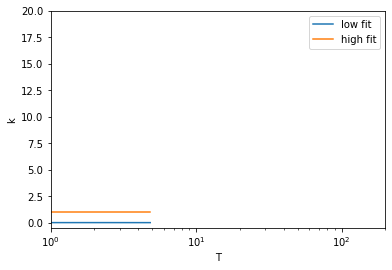

In [38]:

low_fit = T*np.polyval(low_param, T)
hi_fit = 10**np.polyval(hi_param, np.log10(T))

plt.figure()
# plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param)/xs, label='combined fit')
plt.plot(xs, low_fit/xs, label='low fit')
plt.plot(xs, hi_fit, label='high fit')

plt.semilogx()
plt.ylabel("k")
plt.xlabel("T")
plt.xlim((1, 200))
plt.ylim((-0.5, 20))

plt.legend()
plt.show()